In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

#Geração de dados

In [4]:
df = pd.DataFrame()
# Estabelecendo alcance de anos de 2022 - 2023
# Em caso de erro verificar o link dos dados e adapatar

for _,ano in enumerate(np.arange(22,24)):
  for _ ,mes in enumerate(np.arange(1,13)):
    if (ano == datetime.datetime.now().year - 2000) & (mes == 6):
      break
    else:
      if mes<10:
        df_temp = pd.read_csv(f'https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/geracao_usina_2_ho/GERACAO_USINA-2_20{ano}_0{mes}.csv',sep=';',parse_dates= ['din_instante'])
      else:
        df_temp = pd.read_csv(f'https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/geracao_usina_2_ho/GERACAO_USINA-2_20{ano}_{mes}.csv',sep=';',parse_dates= ['din_instante'])

      df = pd.concat([df,df_temp],axis=0)


In [5]:
df = df.set_index('din_instante')

In [ ]:
df.head(5)

#EDA

##Distrubuição de tipos de usinas

In [6]:
#Distribuição da densidade do combustivel por ano

frame_anos = pd.DataFrame()
anos = list(set(df.index.year))

for i, ano in enumerate(anos):
  combs = pd.DataFrame()
  df_ano = df.loc[f'{ano}']
  for _ ,tipo_comb in enumerate(df_ano['nom_tipocombustivel'].unique()):
    temp_data = pd.DataFrame([len(df_ano[df_ano['nom_tipocombustivel'] ==tipo_comb].groupby('nom_usina').size())],index=[tipo_comb])
    combs = pd.concat([combs,temp_data],axis=0)

  frame_anos = pd.concat([frame_anos,combs],axis=1)
frame_anos.columns = anos
frame_anos = frame_anos[frame_anos>0].dropna(axis=0)
frame_anos

,2022,2023
Hidráulica,208.0,211.0
Gás,51.0,55.0
Óleo Combustível,23.0,23.0
Eólica,176.0,172.0
Outras Multi-Combustível,23.0,23.0
Carvão,9.0,9.0
Resíduos Industriais,9.0,9.0
Fotovoltaica,63.0,101.0
Biomassa,54.0,54.0
Óleo Diesel,26.0,25.0


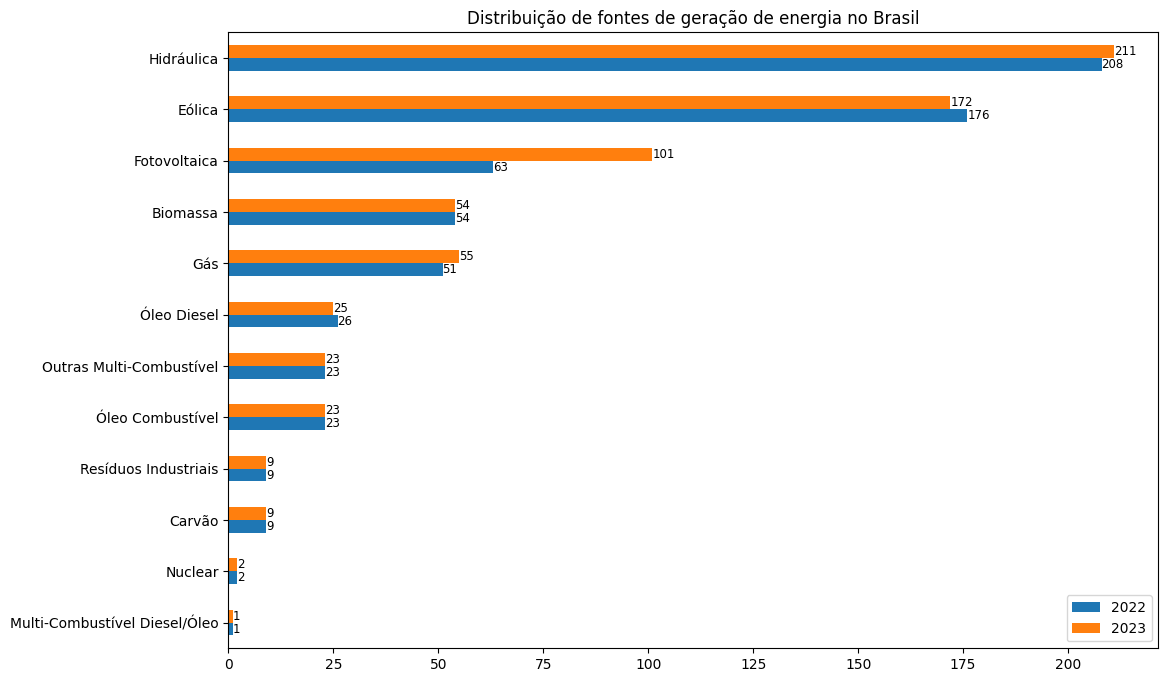

In [7]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
frame_anos.sort_values(frame_anos.columns[0]).plot.barh(ax=ax)
for bars in ax.containers:
    ax.bar_label(bars,fontsize=8.5)
ax.legend(loc='lower right')
plt.title('Distribuição de fontes de geração de energia no Brasil')
plt.show()

In [8]:
#Distribuição da densidade do combustivel por mês
lst_temp = []

meses = list(set(df.index.to_period('M').unique()))

for i, mes in enumerate(meses):
  combs = pd.DataFrame()
  df_mes = df.loc[f'{mes}']

  for _ ,tipo_comb in enumerate(df_mes['nom_tipocombustivel'].unique()):
    temp_data = pd.DataFrame([len(df_mes[df_mes['nom_tipocombustivel'] ==tipo_comb].groupby('nom_usina').size())],index=[tipo_comb],columns=[mes])
    combs = pd.concat([combs,temp_data],axis=0)

  lst_temp.append(combs)

frame_meses = pd.concat(lst_temp,axis=1).T
frame_meses = frame_meses[frame_meses.columns.dropna()].sort_index().fillna(0)
frame_meses

,Hidráulica,Gás,Óleo Combustível,Eólica,Resíduos Industriais,Outras Multi-Combustível,Carvão,Biomassa,Óleo Diesel,Multi-Combustível Diesel/Óleo,Fotovoltaica,Nuclear
2022-01,203.0,41.0,23.0,152.0,9.0,23.0,9.0,49.0,24.0,0.0,42.0,2.0
2022-02,204.0,42.0,23.0,151.0,8.0,23.0,9.0,48.0,25.0,0.0,44.0,2.0
2022-03,204.0,42.0,23.0,152.0,8.0,23.0,9.0,47.0,24.0,0.0,44.0,2.0
2022-04,205.0,42.0,23.0,153.0,8.0,23.0,9.0,50.0,24.0,0.0,45.0,2.0
2022-05,205.0,43.0,23.0,157.0,8.0,23.0,9.0,50.0,24.0,0.0,46.0,2.0
2022-06,205.0,43.0,23.0,153.0,8.0,23.0,9.0,51.0,24.0,0.0,48.0,2.0
2022-07,205.0,45.0,23.0,159.0,8.0,23.0,9.0,51.0,24.0,0.0,49.0,2.0
2022-08,205.0,46.0,23.0,161.0,8.0,23.0,9.0,51.0,24.0,0.0,50.0,2.0
2022-09,208.0,48.0,23.0,163.0,8.0,23.0,9.0,52.0,24.0,0.0,51.0,2.0
2022-10,208.0,50.0,23.0,164.0,8.0,23.0,9.0,52.0,24.0,0.0,56.0,2.0


In [9]:
# Organizar dados por mês e apresentar a diferença entre os anos analisados em formas absolutas e em porcentagem.
meses_ano = ['Janeiro','Fevereiro','Marco','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
values = pd.DataFrame()
values_per = pd.DataFrame()
for i, mes in enumerate(np.arange(1,frame_meses.index.month[-1]+1)):
  values[f'{meses_ano[i]}'] = (frame_meses[frame_meses.index.month == mes].T.iloc[:,1] - frame_meses[frame_meses.index.month == mes].T.iloc[:,0])
  values_per[f'{meses_ano[i]}'] = round(100*(frame_meses[frame_meses.index.month == mes].T.iloc[:,1] - frame_meses[frame_meses.index.month == mes].T.iloc[:,0])/frame_meses[frame_meses.index.month == mes].T.iloc[:,0],2)
values = values.T
values_per = values_per.T.replace(np.inf,0)

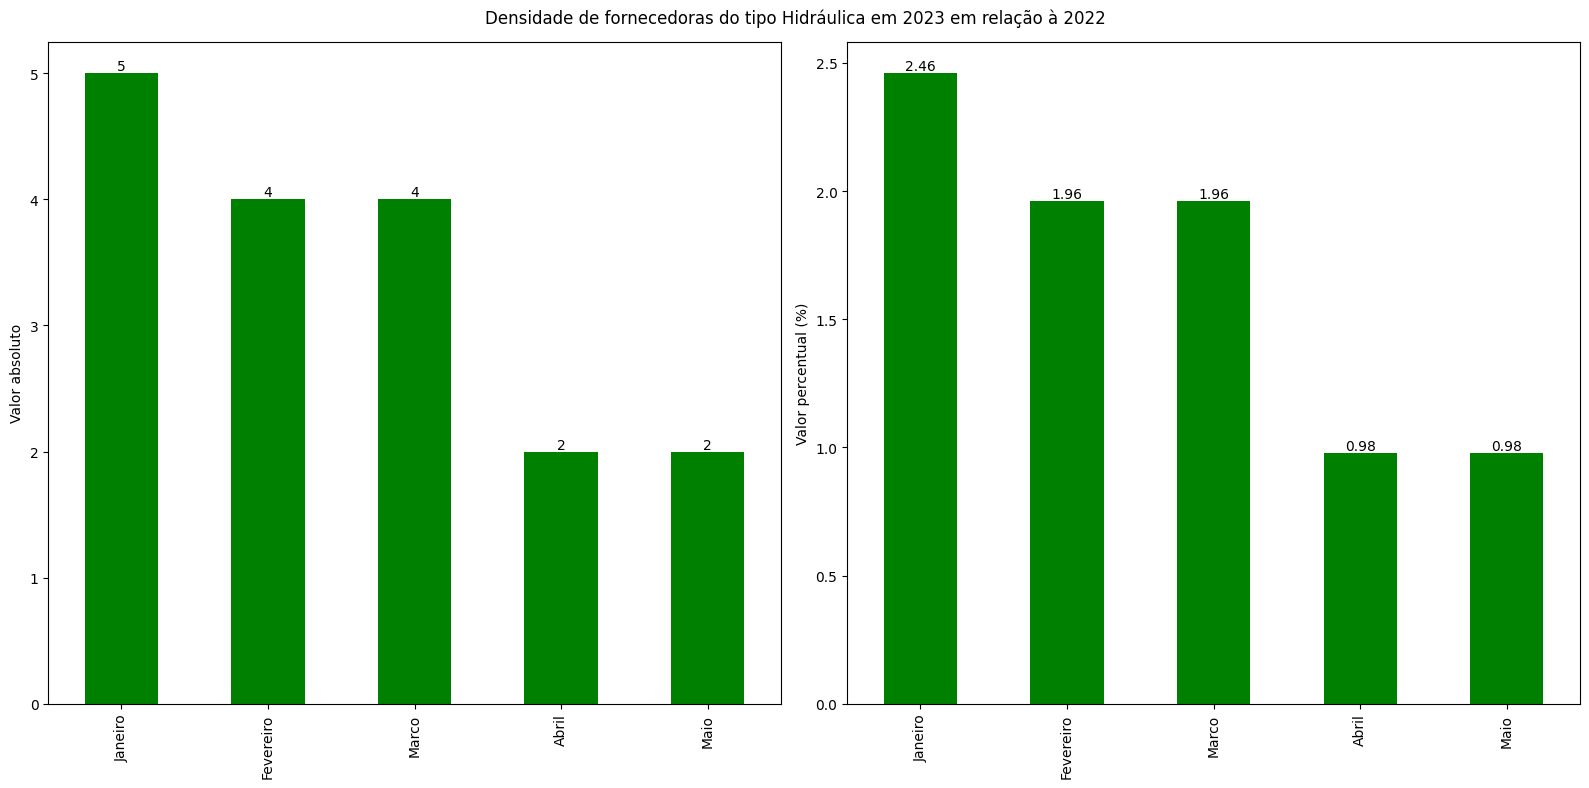

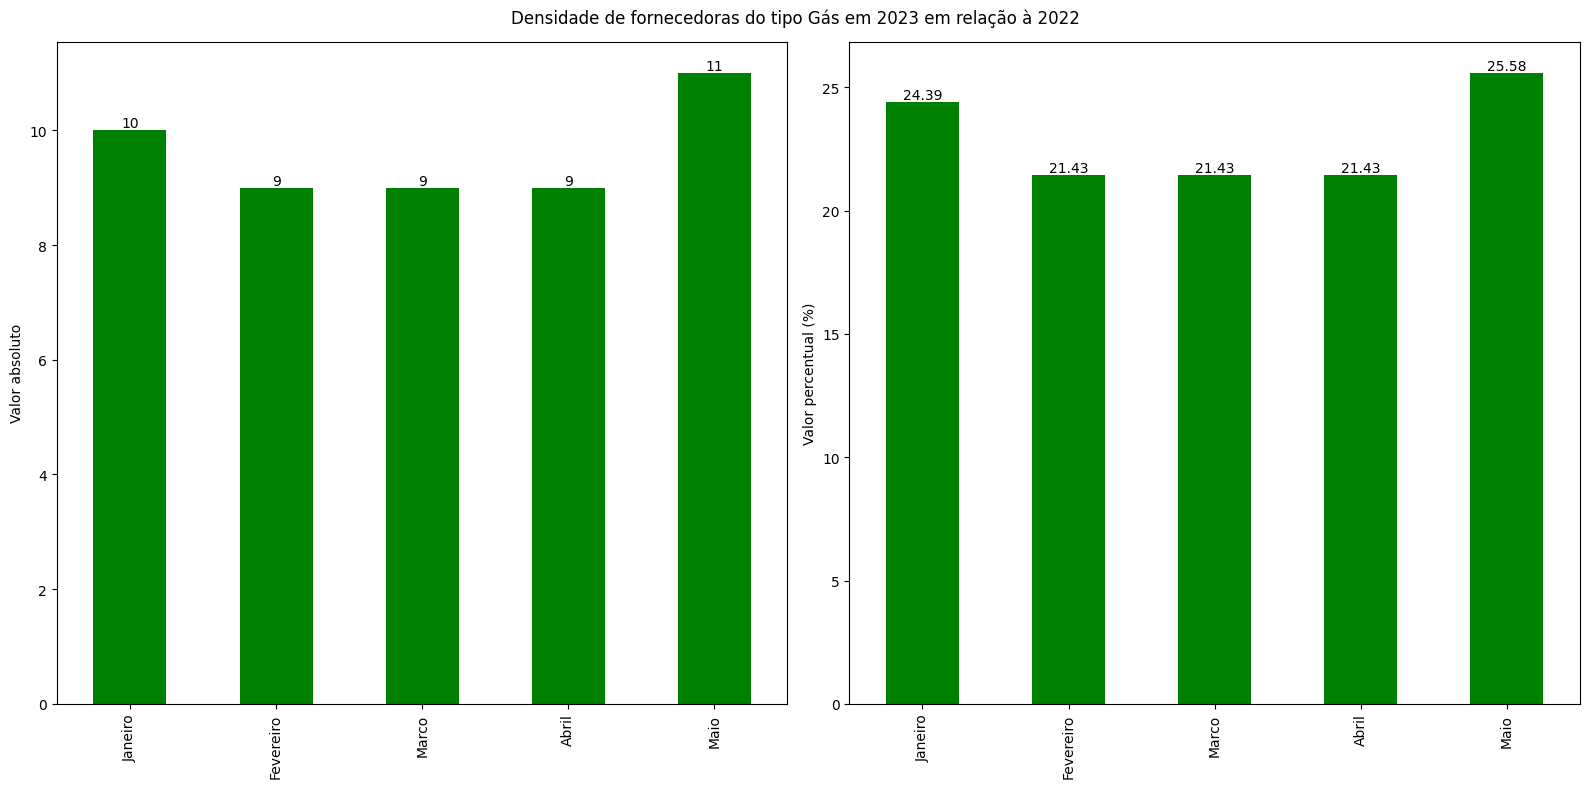

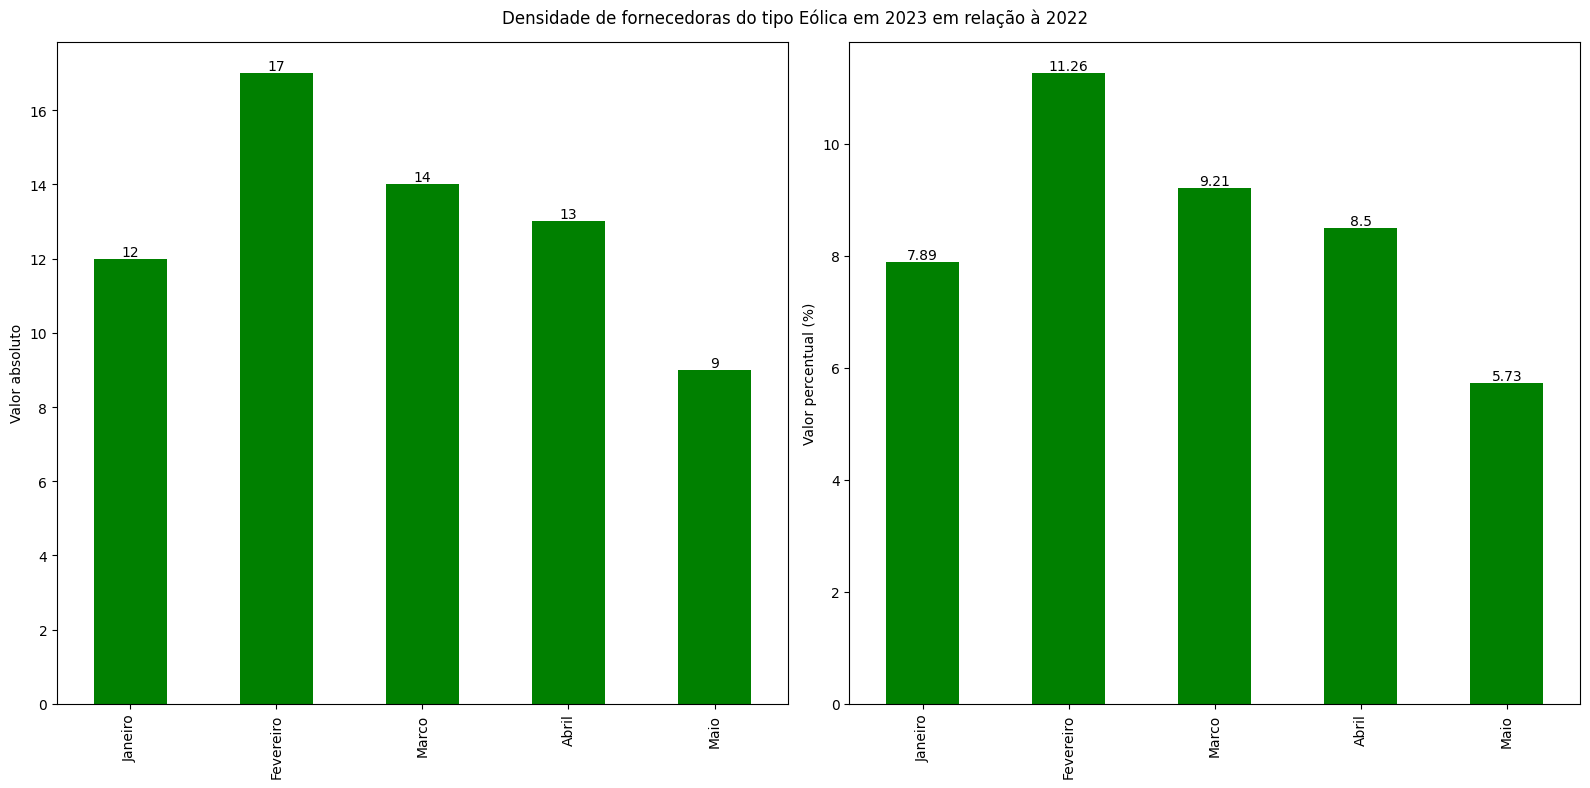

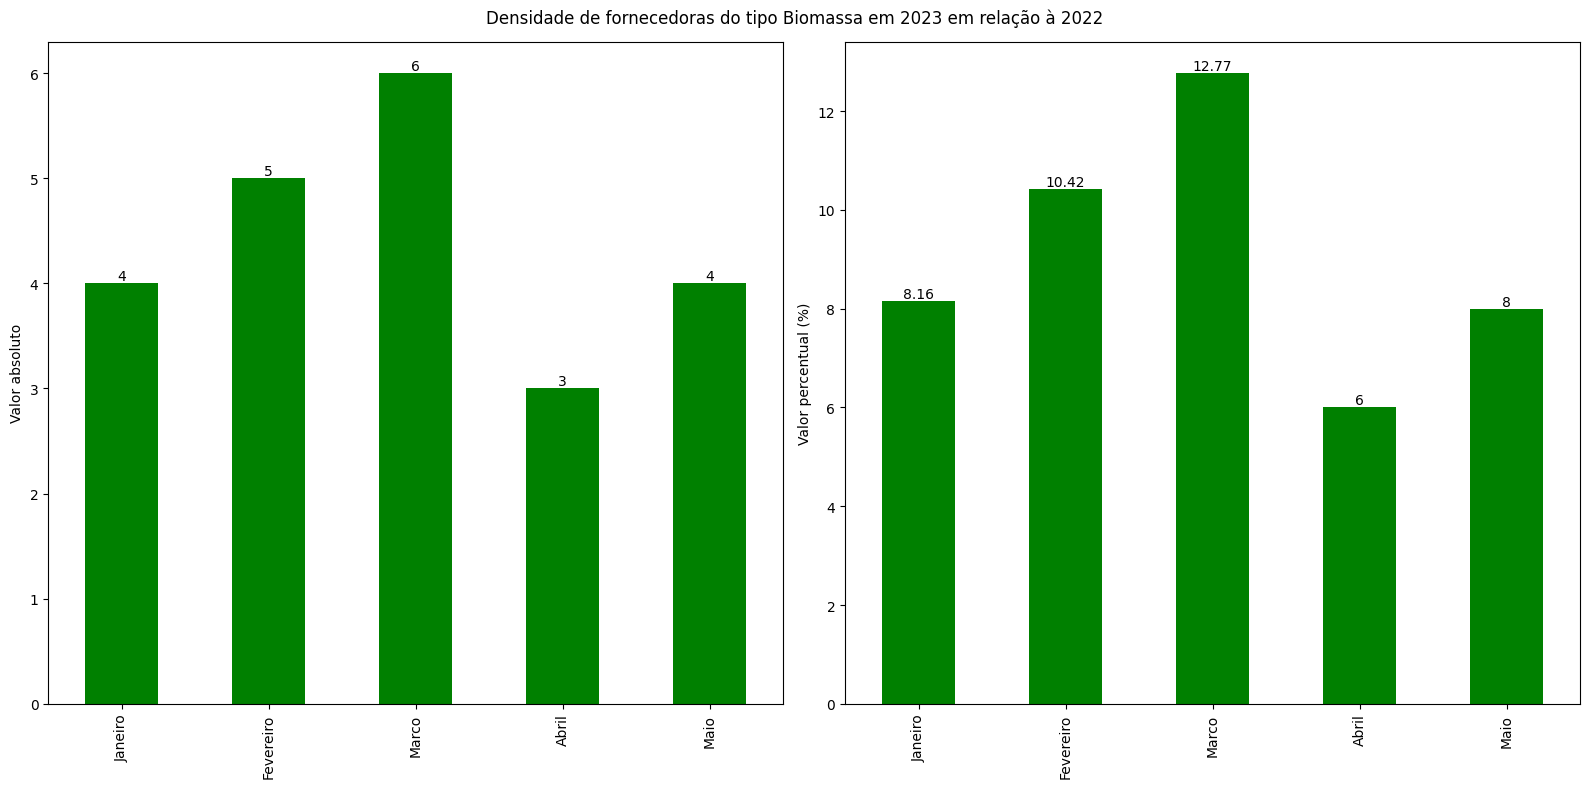

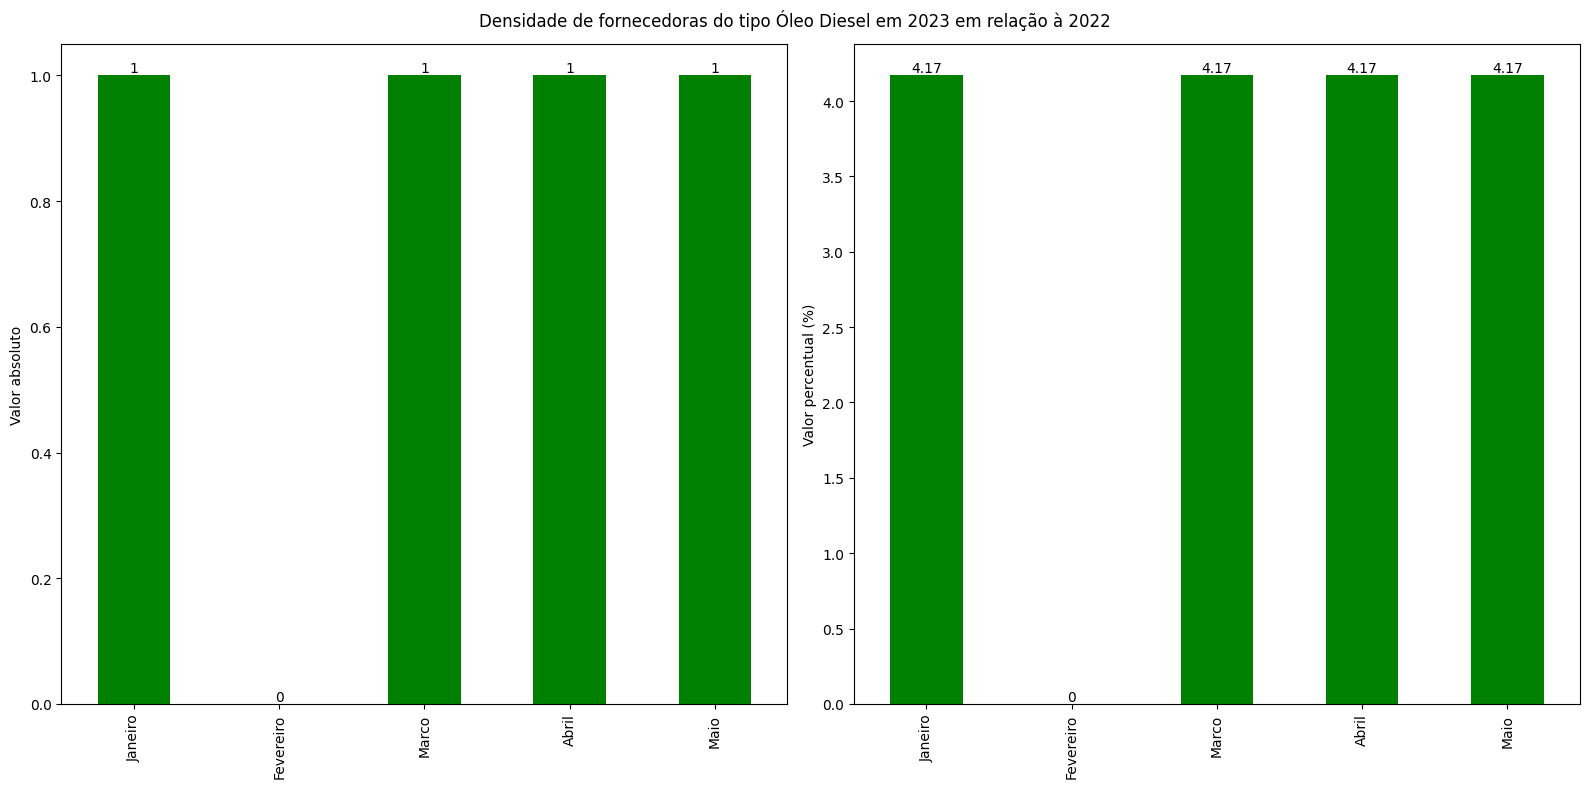

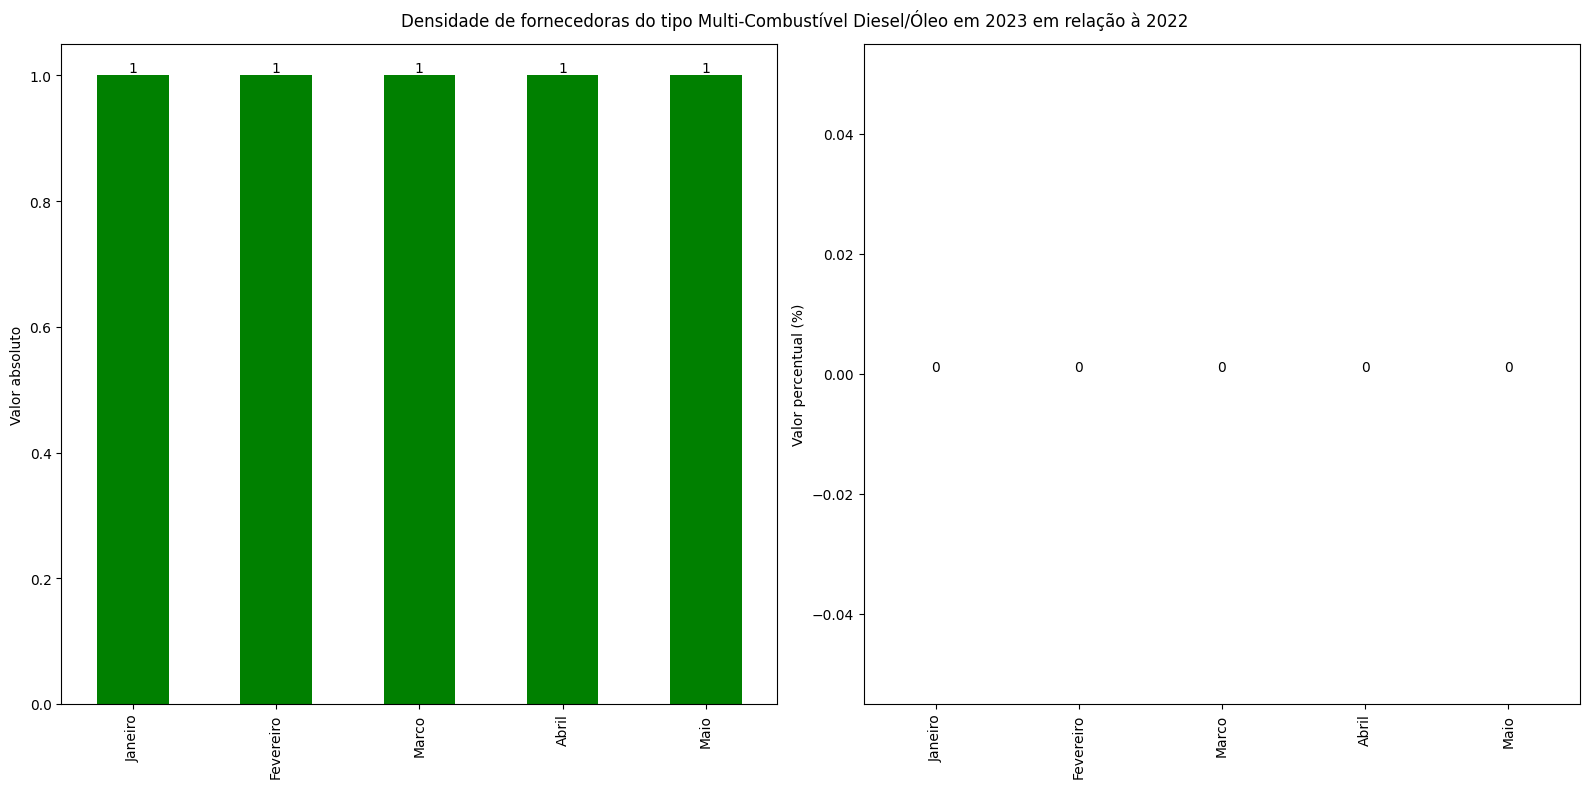

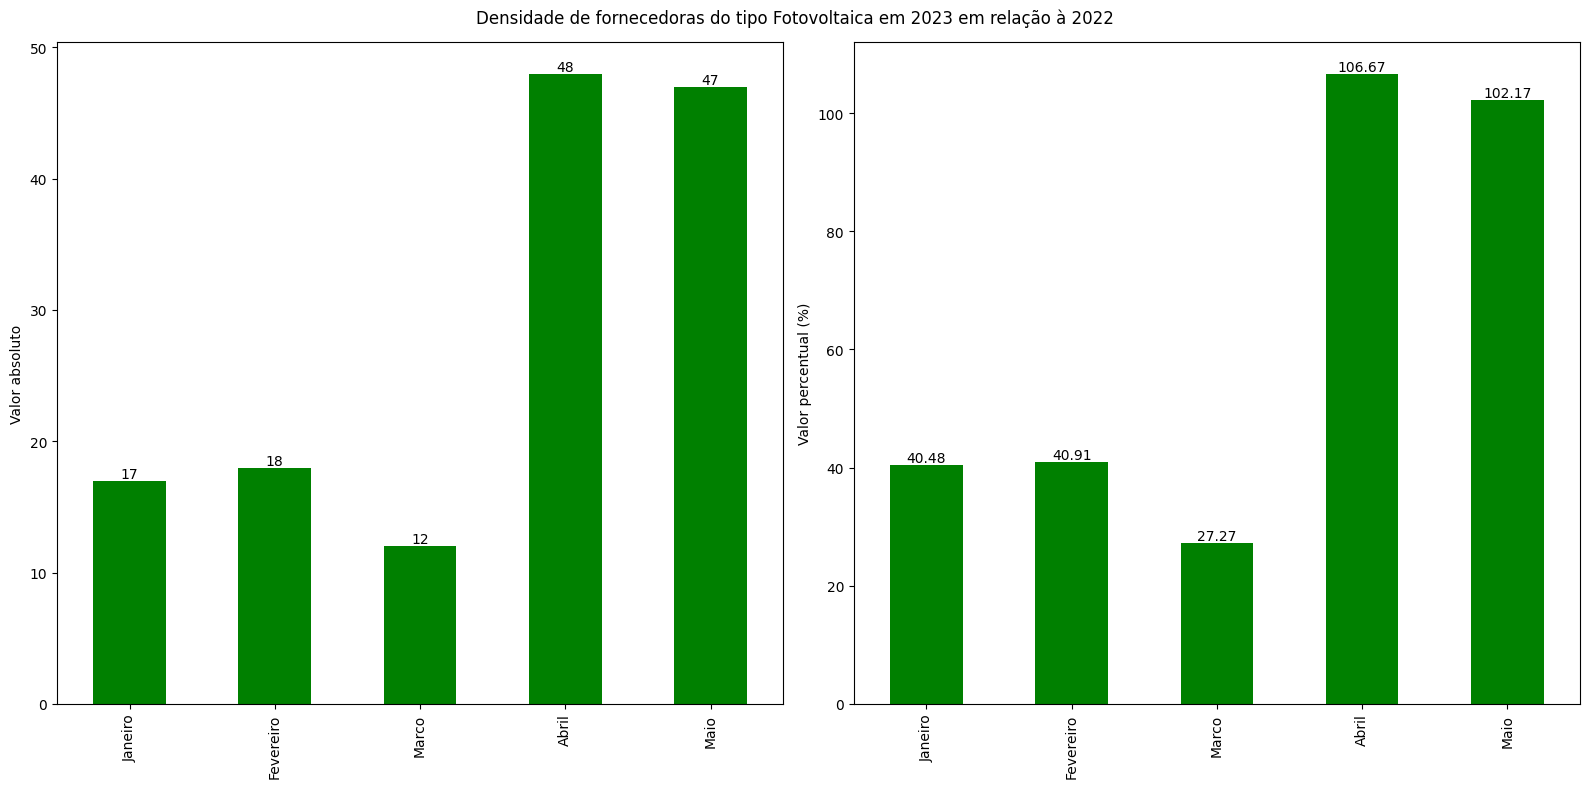

In [10]:
#Gráfico de barras simples, verde = aumento, vermelho = redução.
#Determinados meses podem não aparecer pois é analisado apenas os meses presentes em ambos os anos filtrados.
for i, sistema in enumerate(values.columns):
  if len(values[values[sistema]!=0]) !=0:
    fig, ax = plt.subplots(1,2,figsize=(16,8))

    colors = np.where(values[sistema] < 0, 'red', 'green')
    colors_per = np.where(values_per[sistema] < 0, 'red', 'green')

    values[sistema].plot.bar(ax=ax[0],color=colors)
    values_per[sistema].plot.bar(ax=ax[1],color=colors_per)

    for bars in ax[0].containers:
      ax[0].bar_label(bars,fontsize=10)

    for bars in ax[1].containers:
      ax[1].bar_label(bars,fontsize=10)

    ax[0].set_ylabel(f'Valor absoluto')
    ax[1].set_ylabel(f'Valor percentual (%)')
    fig.suptitle(f'Densidade de fornecedoras do tipo {sistema} em 2023 em relação à 2022')
    plt.tight_layout()
    plt.show()
    print('\n\n')


##Usinas Hidrelétricas com maior geração

In [74]:
#Filtrar por tipo de geração de energia
df_uhe = df[df['nom_tipocombustivel'] ==df['nom_tipocombustivel'].unique()[0]]

In [75]:
#Melhores X UHE com maiores quantidades de energia produzida por ano
anos = list(set(df.index.year))
melhores = 5
uhe_anos = pd.DataFrame()
for _, ano in enumerate(anos):
  df_hidro = df_uhe.loc[f'{ano}']
  uhe_maxcap = df_hidro.groupby(['nom_usina']).sum(numeric_only=True).sort_values('val_geracao',ascending=False).dropna(axis=0)[:melhores].reset_index()
  uhe_maxcap = uhe_maxcap.set_index('nom_usina')
  uhe_maxcap.columns = [f'Produzido em {ano}']
  uhe_anos = pd.concat([uhe_anos,uhe_maxcap],axis=1)
uhe_anos


,Produzido em 2022,Produzido em 2023
nom_usina,,
Belo Monte,3.578451e+07,2.583985e+07
Itaipu 60 Hz,3.407487e+07,1.649413e+07
Tucuruí,3.274534e+07,1.556984e+07
Itaipu 50 Hz,1.841965e+07,9.433536e+06
Santo Antônio,1.784376e+07,7.347042e+06


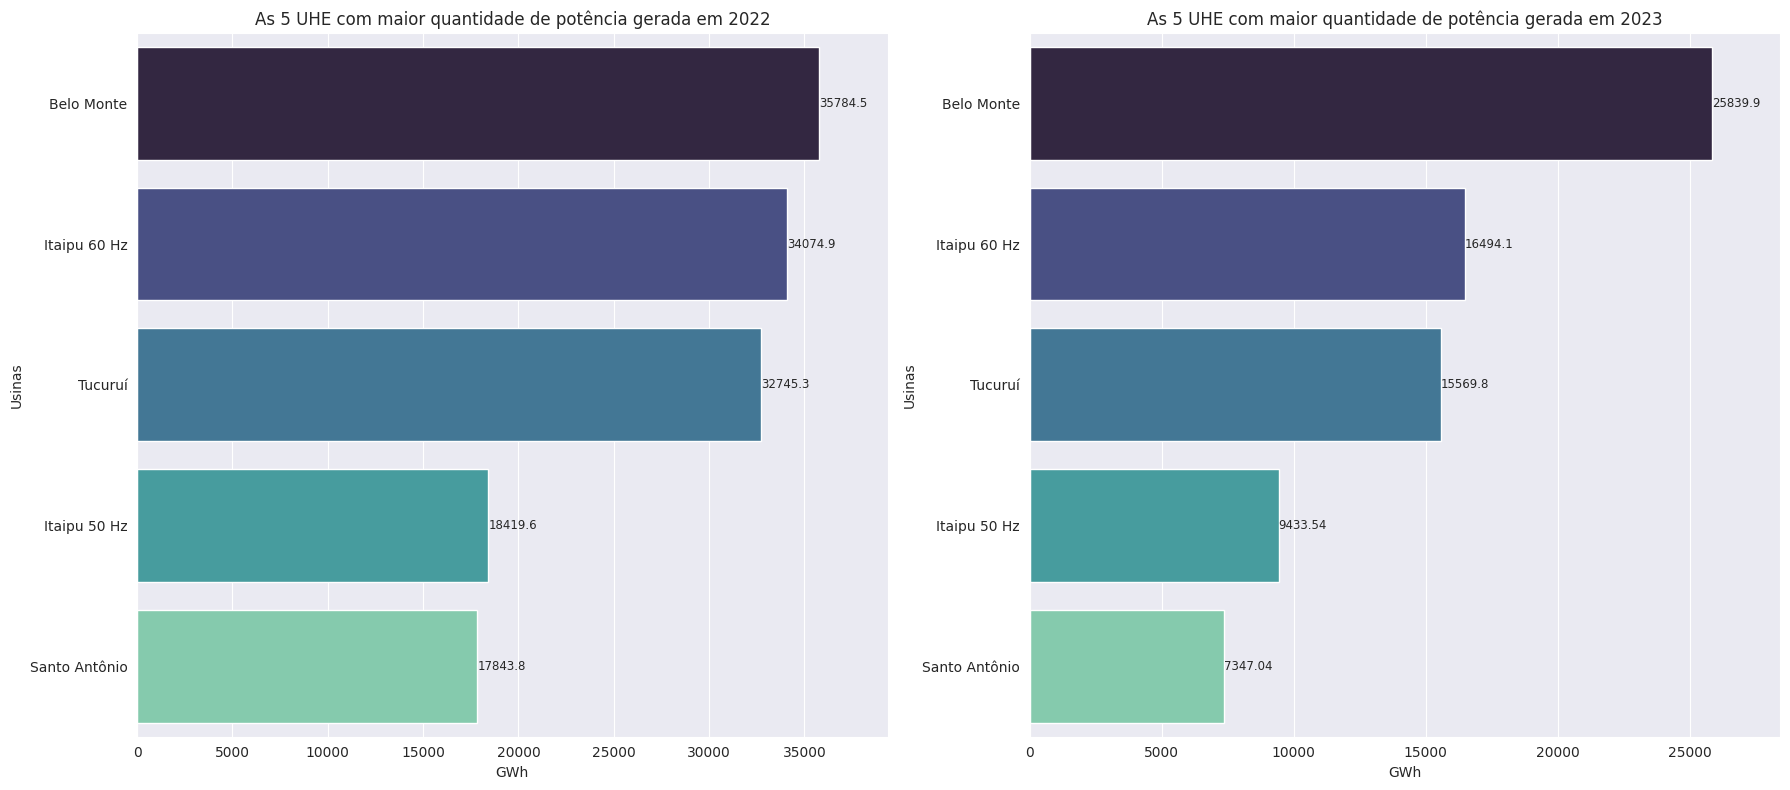

In [93]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(1,2,figsize=(18,8))

sns.barplot(data=uhe_anos/1000,x='Produzido em 2022',y = uhe_anos.index.values,ax=ax[0],palette =  sns.color_palette("mako",len(uhe_anos.index.values) ,as_cmap=False))
ax[0].set_title(f'As {melhores} UHE com maior quantidade de energia gerada em 2022')
ax[0].set_xlabel('GWh')
ax[0].set_ylabel('Usinas')

sns.barplot(data=uhe_anos/1000,x='Produzido em 2023',y = uhe_anos.index.values,ax=ax[1],palette = sns.color_palette("mako",len(uhe_anos.index.values) ,as_cmap=False))
ax[1].set_title(f'As {melhores} UHE com maior quantidade de energia gerada em 2023')
ax[1].set_xlabel('GWh')
ax[1].set_ylabel('Usinas')

for bars in ax[0].containers:
    ax[0].bar_label(bars,fontsize=8.5)

for bars in ax[1].containers:
    ax[1].bar_label(bars,fontsize=8.5)


ax[1].set_xlim(0,(uhe_anos['Produzido em 2023']/1000).values[0]*1.1)
ax[0].set_xlim(0,(uhe_anos['Produzido em 2022']/1000).nlargest(1).values[0]*1.1)

plt.tight_layout()
plt.show()

In [34]:
#Filtragem de energia gerada por usina, por e em cada região
anos = list(set(df.index.year))
melhores = 6
df_uhe_regiao = []
for _, regiao in enumerate(df['nom_subsistema'].unique()):
  uhe_anos = pd.DataFrame()
  for _, ano in enumerate(anos):
    df_hidro = df_uhe[df_uhe['nom_subsistema']== regiao].loc[f'{ano}']
    uhe_maxcap = df_hidro.groupby(['nom_usina']).sum(numeric_only=True).sort_values('val_geracao',ascending=False).dropna(axis=0)[:melhores].reset_index()
    uhe_maxcap = uhe_maxcap.set_index('nom_usina')
    uhe_maxcap.columns = [f'Produzido em {ano} em {regiao}']
    uhe_anos = pd.concat([uhe_anos,uhe_maxcap],axis=1)
  df_uhe_regiao.append(uhe_anos)
df_uhe_regiao = pd.concat(df_uhe_regiao,axis=1)

In [35]:
df_regiao_2022 = df_uhe_regiao.iloc[:,:-2:2]
df_regiao_2023 = df_uhe_regiao.iloc[:,1:-2:2]

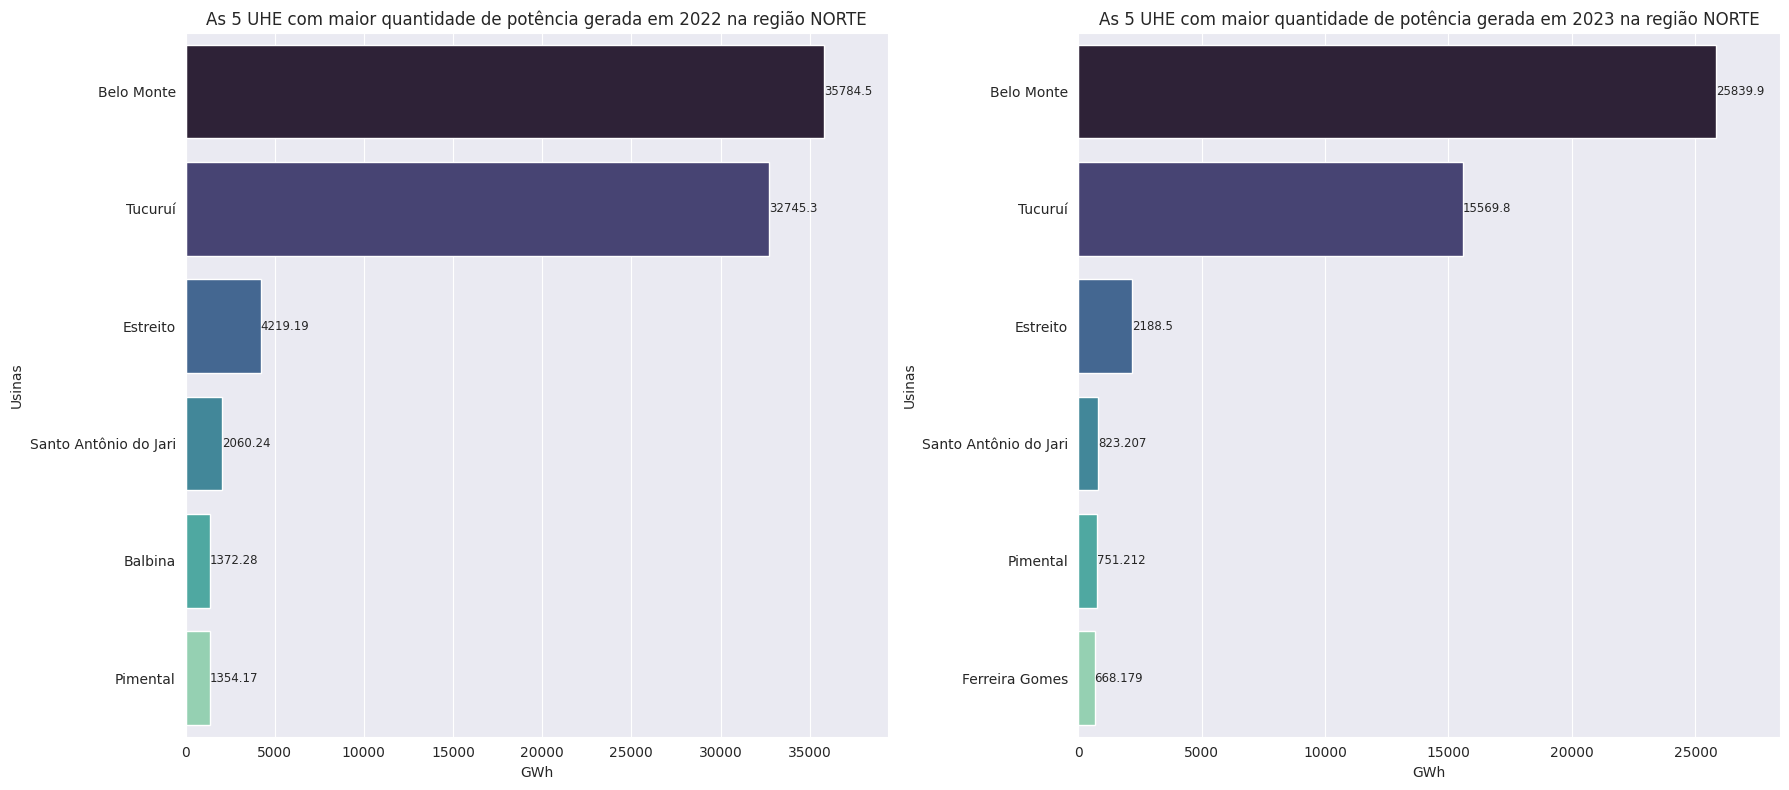

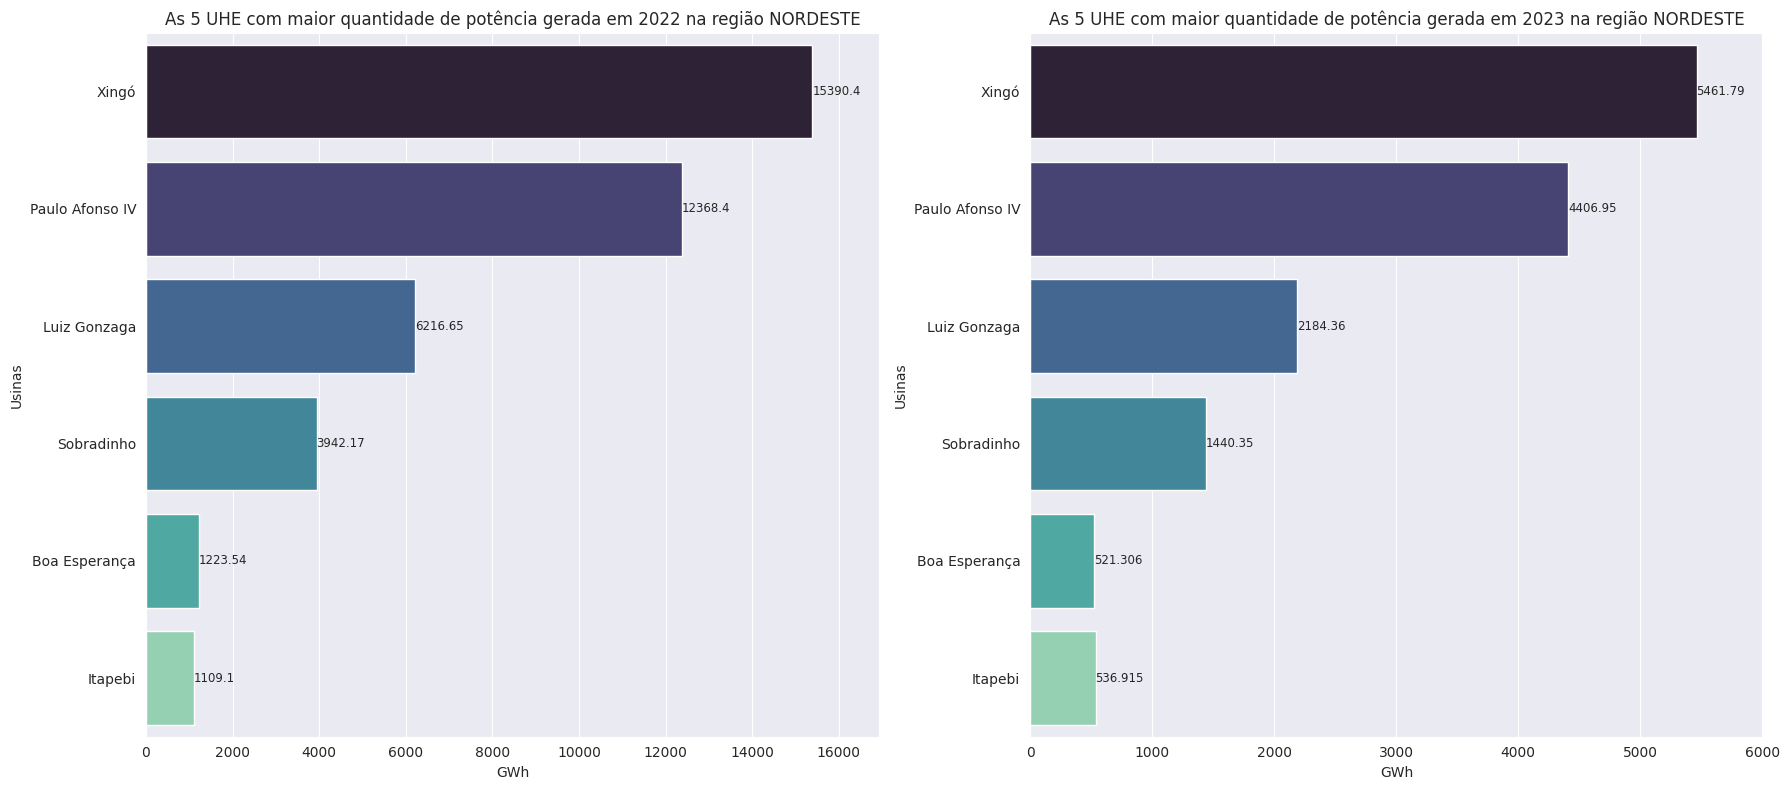

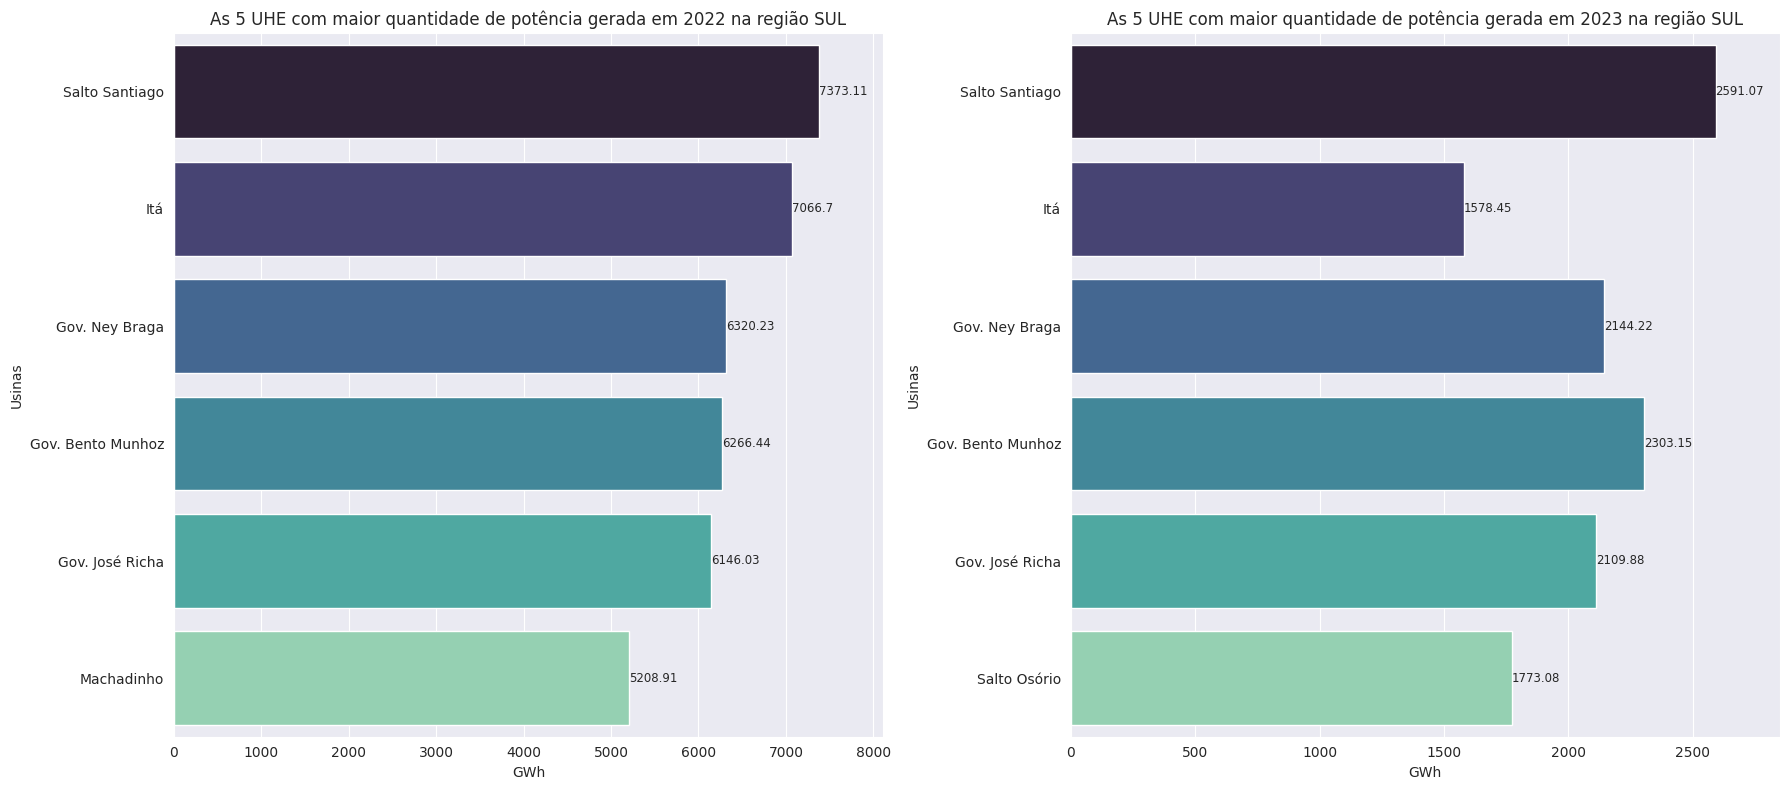

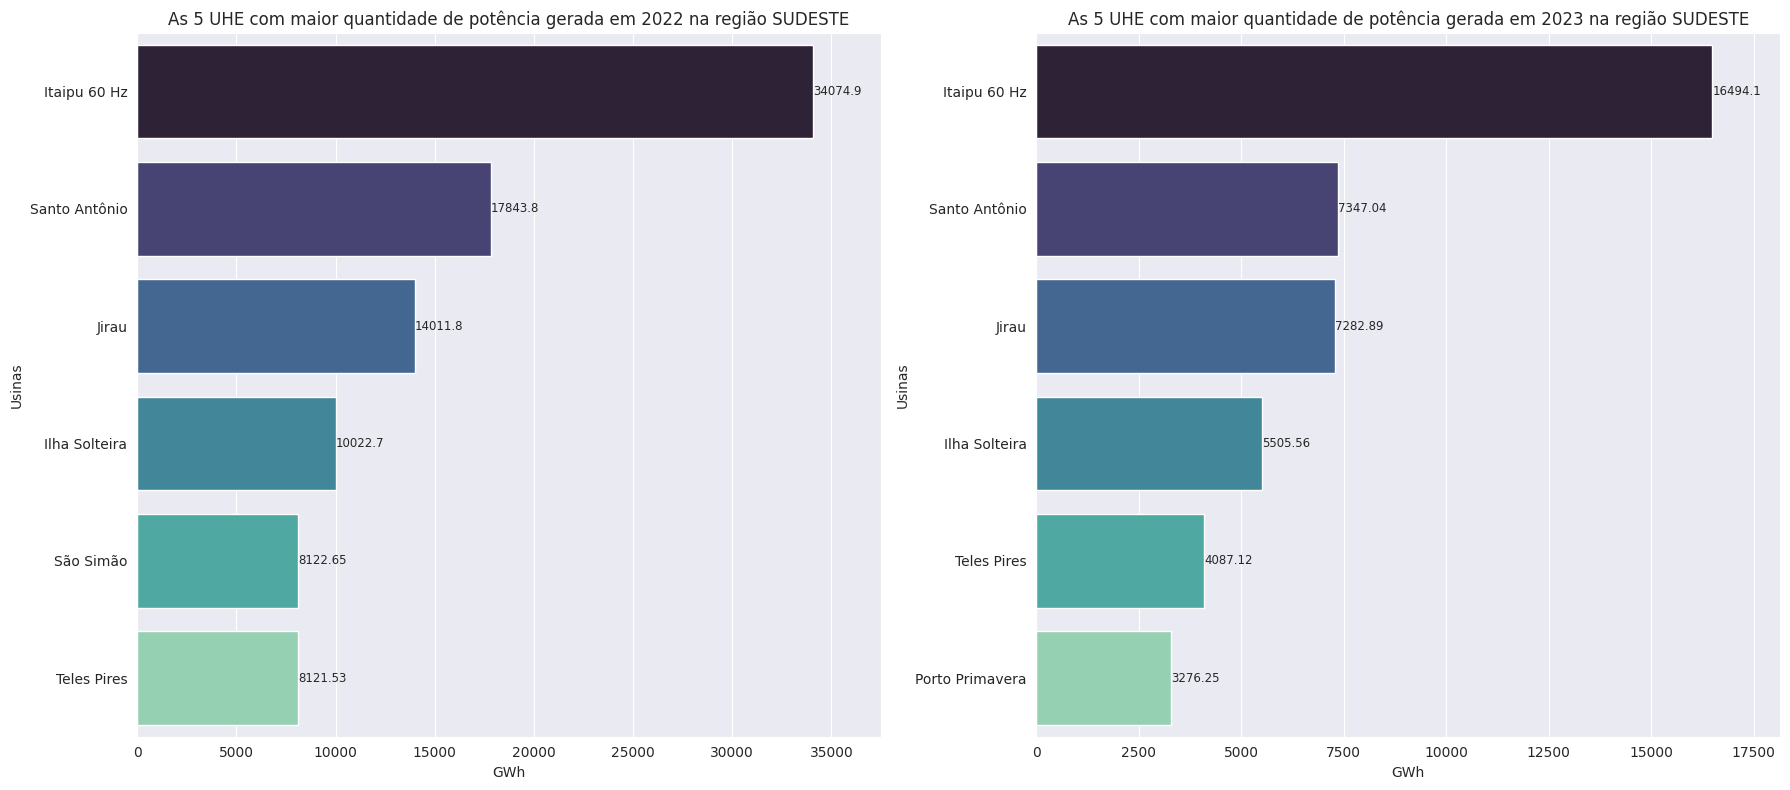

In [94]:
for i, j in enumerate(df_regiao_2022.columns):
  sns.set_style('darkgrid')
  fig,ax = plt.subplots(1,2,figsize=(18,8))

  regiao = df_regiao_2022.columns[i].split(' ')[-1]

  filtred_2022 = df_regiao_2022[df_regiao_2022.columns[i]].to_frame().dropna()/1000
  filtred_2023 = df_regiao_2023[df_regiao_2023.columns[i]].to_frame().dropna()/1000


  sns.barplot(filtred_2022,x=filtred_2022.columns[0],y = filtred_2022.index.values,ax=ax[0],palette = sns.color_palette("mako",len(filtred_2022.index.values) ,as_cmap=False))
  ax[0].set_title(f'As {melhores} UHE com maior quantidade de potência gerada em 2022 na região {regiao}')
  ax[0].set_xlabel('GWh')
  ax[0].set_ylabel('Usinas')
  for bars in ax[0].containers:
      ax[0].bar_label(bars,fontsize=8.5)

  ax[0].set_xlim(0,filtred_2022.iloc[:,0].nlargest(1).values[0]*1.1)


  sns.barplot(data=filtred_2023,x=filtred_2023.columns[0],y = filtred_2023.index.values,ax=ax[1],palette = sns.color_palette("mako",len(filtred_2022.index.values) ,as_cmap=False))
  ax[1].set_title(f'As {melhores} UHE com maior quantidade de potência gerada em 2023 na região {regiao}')
  ax[1].set_xlabel('GWh')
  ax[1].set_ylabel('Usinas')
  for bars in ax[1].containers:
      ax[1].bar_label(bars,fontsize=8.5)
  ax[1].set_xlim(0,(filtred_2023.iloc[:,0]).nlargest(1).values[0]*1.1)
  plt.tight_layout()
  plt.show()

##Geração de energia por região

In [105]:
#Filtrar quantidade de energia gerada por ano em cada região do país
ano = '2022'
df_uhe_reg = df_uhe.loc[ano].groupby(['nom_subsistema']).sum(numeric_only=True).T.drop(['PARAGUAI'],axis=1)
df_uhe_reg.columns.name = None
df_uhe_reg.index = [f'Geração em {ano}']
df_uhe_reg = df_uhe_reg.T
df_uhe_reg = df_uhe_reg.sort_values(df_uhe_reg.columns[0],ascending=False)
df_uhe_reg


,Geração em 2022
SUDESTE,2.192865e+08
NORTE,8.103152e+07
SUL,7.671150e+07
NORDESTE,4.250504e+07


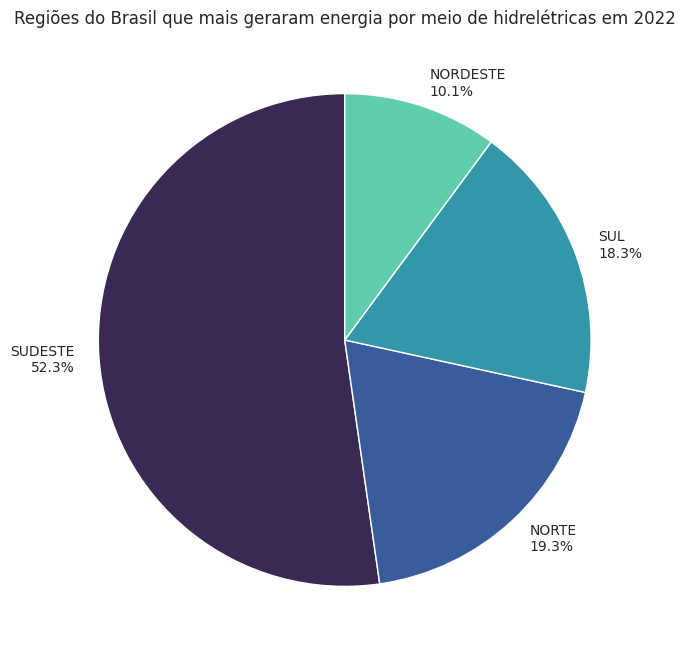

In [107]:
fig, ax = plt.subplots(1,1,figsize=(16,8))

_wedges, labels, percentages = ax.pie(df_uhe_reg.values.flatten(), labels=df_uhe_reg.index, autopct='%1.1f%%', counterclock=True,
                                       startangle=90, colors = sns.color_palette("mako",len(df_uhe_reg.index.values) ,as_cmap=False))

for label, percentage in zip(labels, percentages):
    label.set_text(label.get_text() + '\n' + percentage.get_text())
    percentage.remove()

ax.set_title('Regiões do Brasil que mais geraram energia por meio de hidrelétricas em 2022')

plt.show()

In [108]:
#Filtrar a quantidade de energia gerada por cada estado por ano
ano = '2022'
df_uhe_est = df_uhe.loc[ano].groupby(['nom_estado']).sum(numeric_only=True)/1e3
df_uhe_est = df_uhe_est.sort_values(df_uhe_est.columns[0],ascending = False).drop('z - INTERNACIONAL')
df_uhe_est.columns = ['GWh']
df_uhe_est.head(5)

,GWh
nom_estado,
PARA,81614.677377
PARANA,72884.503477
MINAS GERAIS,50246.190647
SAO PAULO,43961.100800
RONDONIA,33844.881434


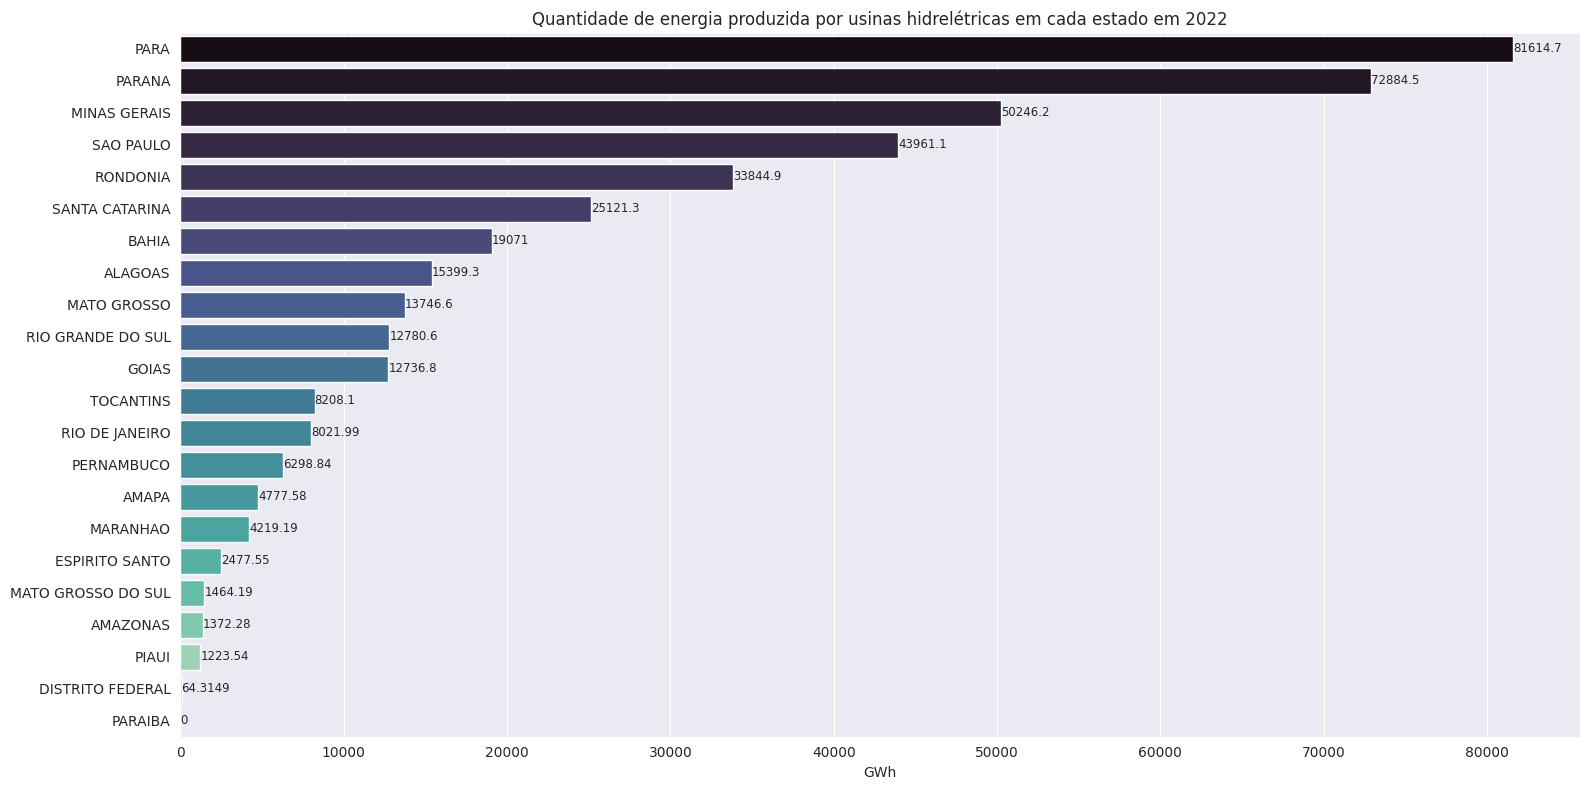

In [110]:
fig, ax = plt.subplots(1,1,figsize=(16,8))

sns.barplot(df_uhe_est,x=df_uhe_est.columns[0],y = df_uhe_est.index.values,ax=ax,palette =  sns.color_palette("mako",len(df_uhe_est.index.values) ,as_cmap=False))

for bars in ax.containers:
    ax.bar_label(bars,fontsize=8.5)
ax.set_title('Quantidade de energia produzida por usinas hidrelétricas em cada estado em 2022')
plt.tight_layout()
plt.show()